#### Yugandhara Premraj Patil
#### ID : AIS031

### classification Task

#### Importing Train data

In [12]:
import pandas as pd
tr=pd.read_excel(r'C:\Users\HP\Desktop\datasets\classification\train.xlsx')
tr
tr.drop('PassengerId',axis=1,inplace=True)
tr.drop('Name',axis=1,inplace=True)
tr.drop('Pclass',axis=1,inplace=True)
tr.drop('Ticket',axis=1,inplace=True)
tr.drop('Cabin',axis=1,inplace=True)
print(tr.head())


   Survived     Sex   Age  SibSp  Parch     Fare Embarked
0         0    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         1  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         0    male  35.0      0      0   8.0500        S


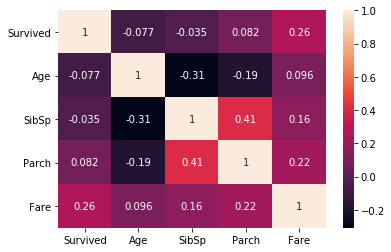

In [13]:
import seaborn as sns
sns.heatmap(tr.corr(),annot=True)

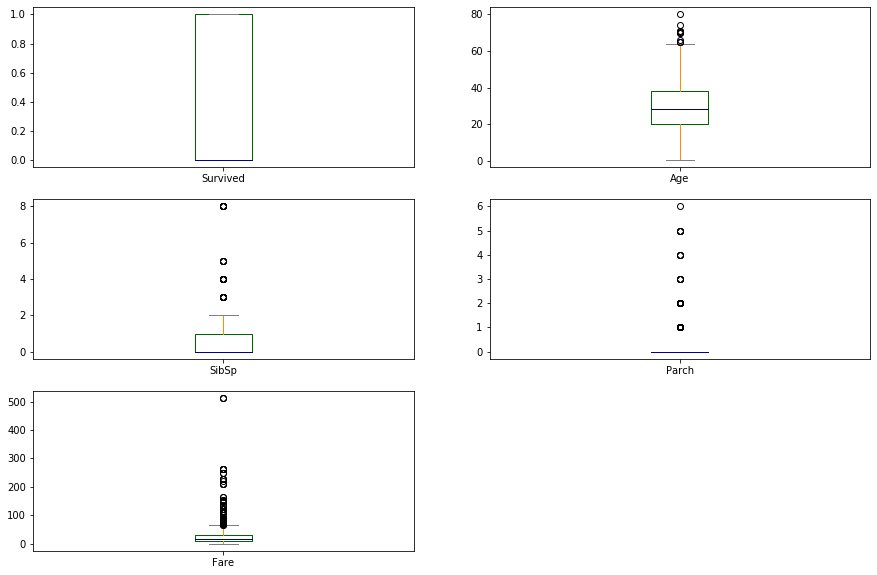

In [65]:
# Checking Otliers
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
tr.plot(kind="box",subplots=True,layout=(3,2),figsize=(15,10),color=color)
plt.show()

In [18]:
tr_c=tr.loc[:,["Sex","Embarked"]]
tr_c

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [52]:
dum_tr=pd.get_dummies(tr_c,drop_first=True)

#### Separating Numeric Variables

In [53]:
tr_n=tr.loc[:,['SibSp','Parch','Fare','Age','Survived']]
print(tr_n.head())

   SibSp  Parch     Fare   Age  Survived
0      1      0   7.2500  22.0         0
1      1      0  71.2833  38.0         1
2      0      0   7.9250  26.0         1
3      1      0  53.1000  35.0         1
4      0      0   8.0500  35.0         0


#### Checking the null values

In [54]:
nan_c=pd.isnull(dum_tr).sum()
print(nan_c[nan_c>0])
nan_n=pd.isnull(tr_n).sum()
print(nan_n[nan_n>0])

Series([], dtype: int64)
Age    177
dtype: int64


#### Filling 'Age' by mean

In [72]:
mean=tr_n['Age'].mean()
print(mean)
tr_n['Age'].fillna(mean,inplace=True)
tr_n['Age'].head()

29.699117647058763


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

#### Concatinating Numeric and Categorical Variable

In [57]:
tr_1=pd.concat([tr_n,dum_tr],axis=1)
print(tr_1.columns)

Index(['SibSp', 'Parch', 'Fare', 'Age', 'Survived', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


#### Model Building

In [58]:
import numpy as np
x=tr_1.loc[:,['SibSp', 'Parch', 'Fare', 'Age', 'Sex_male', 'Embarked_Q',
       'Embarked_S']]
y=tr_1.loc[:,['Survived']]
y=np.ravel(y)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=4)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [60]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
print("Accuaracy Score",accuracy_score(y_test,y_pred))

Accuaracy Score 0.717948717948718


#### Importing Testing set

In [84]:
import pandas as pd
test=pd.read_excel(r'C:\Users\HP\Desktop\datasets\classification\test.xlsx')
test
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.drop('Pclass',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
print(test.head())

      Sex   Age  SibSp  Parch     Fare Embarked
0    male  34.5      0      0   7.8292        Q
1  female  47.0      1      0   7.0000        S
2    male  62.0      0      0   9.6875        Q
3    male  27.0      0      0   8.6625        S
4  female  22.0      1      1  12.2875        S


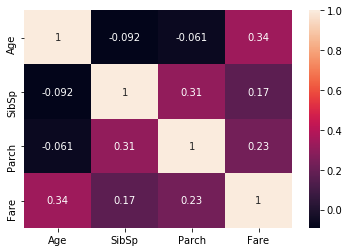

In [85]:
import seaborn as sns
sns.heatmap(test.corr(),annot=True)

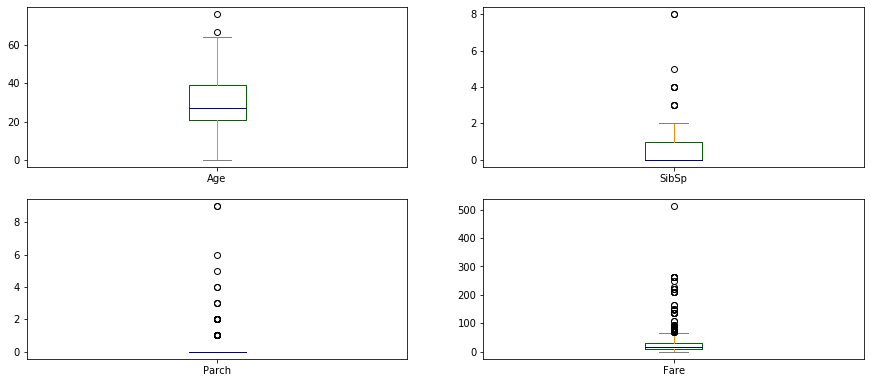

In [86]:
# Checking Otliers
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
test.plot(kind="box",subplots=True,layout=(3,2),figsize=(15,10),color=color)
plt.show()

In [87]:
test_c=test.loc[:,["Sex","Embarked"]]
test_c

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [88]:
dum_test=pd.get_dummies(test_c,drop_first=True)

#### Separating Numeric Variable

In [89]:
test_n=test.loc[:,['SibSp','Parch','Fare','Age']]
print(test_n.head())

   SibSp  Parch     Fare   Age
0      0      0   7.8292  34.5
1      1      0   7.0000  47.0
2      0      0   9.6875  62.0
3      0      0   8.6625  27.0
4      1      1  12.2875  22.0


#### Checking The Null Values

In [90]:
nan_c1=pd.isnull(dum_test).sum()
print(nan_c1[nan_c1>0])
nan_n1=pd.isnull(test_n).sum()
print(nan_n1[nan_n1>0])

Series([], dtype: int64)
Fare     1
Age     86
dtype: int64


#### Filling the 'Age' and 'Fare' By Mean

In [95]:
# filling Age by mean
mean=test_n['Age'].mean()
print(mean)
test_n['Age'].fillna(mean,inplace=True)
test_n['Age'].head()
# filling Fare by mean
mean1=test_n['Fare'].mean()
print(mean1)
test_n['Fare'].fillna(mean1,inplace=True)
test_n['Fare'].head()

30.272590361445815
35.6271884892086


0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64

#### Concatinating Numeric and Categorical Variable:

In [96]:
test_1=pd.concat([test_n,dum_test],axis=1)
print(test_1.columns)

Index(['SibSp', 'Parch', 'Fare', 'Age', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


#### Generating Model on Testing Data

In [97]:
import numpy as np
x1=test_1.loc[:,['SibSp', 'Parch', 'Fare', 'Age', 'Sex_male', 'Embarked_Q',
       'Embarked_S']]

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train,y_train)
y_pred1=knn1.predict(x1)

#### File Submission

In [102]:
test=pd.read_excel(r'C:\Users\HP\Desktop\datasets\Classification\test.xlsx')
PassengerId=test['PassengerId']
Name=test['Name']
Ticket=test['Ticket']
Cabin=test['Cabin']
Pclass=test['Pclass']

In [103]:
submission=pd.DataFrame({'PassengerId':PassengerId,'Name':Name,'Ticket':Ticket,'Cabin':Cabin,'Pclass':Pclass,'Survived':y_pred1})
submission.to_excel("C:\\Users\\HP\\Desktop\\datasets\\sample_submission1.xlsx",index=False)